In [349]:
%run "part02_preprocessing.ipynb"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   region_code           381109 non-null  float64
 4   policy_sales_channel  381109 non-null  float64
 5   driving_license       381109 non-null  int64  
 6   vehicle_age           381109 non-null  object 
 7   vehicle_damage        381109 non-null  object 
 8   previously_insured    381109 non-null  int64  
 9   annual_premium        381109 non-null  float64
 10  vintage               381109 non-null  int64  
 11  response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.8+ MB
=====================  ===========================================================================

# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Content</p></div>

**Data Preparation**
   - Feature Engiennier
   - Encoding
   - Normalization
   - Feature Selection
   - Outliers

# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Data Preparation</p></div>

In [350]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [351]:
data_prep = data.copy()

In [352]:
data.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,1,Male,44,28.0,26.0,1,> 2 Years,Yes,0,40454.0,217,1
1,2,Male,76,3.0,26.0,1,1-2 Year,No,0,33536.0,183,0
2,3,Male,47,28.0,26.0,1,> 2 Years,Yes,0,38294.0,27,1
3,4,Male,21,11.0,152.0,1,< 1 Year,No,1,28619.0,203,0
4,5,Female,29,41.0,152.0,1,< 1 Year,No,1,27496.0,39,0


In [353]:
data_prep['annual_premium'] = data_prep['annual_premium'].apply(lambda x: np.nan if x == 2630.0 else x)

In [354]:
data_prep.isna().sum()

id                          0
gender                      0
age                         0
region_code                 0
policy_sales_channel        0
driving_license             0
vehicle_age                 0
vehicle_damage              0
previously_insured          0
annual_premium          64877
vintage                     0
response                    0
dtype: int64

In [355]:
data_prep=data_prep.dropna()

In [356]:
data_prep.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

In [357]:
data_prep2 = data_prep.copy()

In [358]:
selected_features = [#'id',
                     'age',
                     'gender',   
                     'region_code',
                     'policy_sales_channel',
                     'driving_license',
                     'vehicle_age',                    
                     'vehicle_damage',
                     'previously_insured',
                     'annual_premium',
                     #'vintage'
                    ]

target = 'response'

#data_prep=data_prep[selected_features].copy() 

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Encoding</p></div>

In [359]:
def Enconding(data):
    
    data["gender"] = [0 if i == 'Female' else 1 for i in data["gender"]]
    data["vehicle_damage"] = [0 if i == 'No' else 1 for i in data["vehicle_damage"]]
    data['vehicle_age'] = data['vehicle_age'].apply(lambda x: 0 if x == '< 1 Year' else 1 if x == '1-2 Year' else 3)   


In [360]:
Enconding(data_prep)

In [361]:
data_prep.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,1,1,44,28.0,26.0,1,3,1,0,40454.0,217,1
1,2,1,76,3.0,26.0,1,1,0,0,33536.0,183,0
2,3,1,47,28.0,26.0,1,3,1,0,38294.0,27,1
3,4,1,21,11.0,152.0,1,0,0,1,28619.0,203,0
4,5,0,29,41.0,152.0,1,0,0,1,27496.0,39,0


In [362]:
numerical_features = data_prep[selected_features].select_dtypes(include = 'number').columns.values
categorical_features = data_prep[selected_features].select_dtypes(include = 'object').columns.values

In [363]:
# ohe = OneHotEncoder(handle_unknown='ignore')
# ohe.fit_transform(data_prep[['region_code','policy_sales_channel']])
# ohe.categories_

In [364]:
# preprocessor = ColumnTransformer(transformers=
#     [
#         #('std', MinMaxScaler(), numerical_features),
#         ('ohe', OneHotEncoder(handle_unknown='ignore'), data_prep[['region_code','policy_sales_channel']]), #sparse=False, drop='if_binary',
#        # ('drop_features', 'drop', drop_features)
        
#     ], remainder="drop"
# )

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Scaling</p></div>

In [365]:
#sns.pairplot(data_prep, aspect=1.5);

In [101]:
def Normalization(data_prep):
    
    log_columns = data_prep[selected_features].skew().sort_values(ascending=False)
    log_columns = log_columns.loc[log_columns > 0.75]
    print('Columns/Skew',log_columns)    
    
    # Log Transformations
    for col in log_columns.index:
        data_prep[col] = np.log1p(data_prep[col])
    
    #Scaling
    mms = MinMaxScaler()
    for col in data_prep[selected_features]:
        data_prep[col] = mms.fit_transform(data_prep[[col]]).squeeze()       

In [ ]:
featurepath = '../scr/app/features/'
for col in data_prep[selected_features]:
    pickle.dump (mms, open (featurepath+ f'{col}.pkl', 'wb') )

In [ ]:
Normalization(data_prep)

In [370]:
data_prep[target].value_counts(normalize=True)

0    0.879187
1    0.120813
Name: response, dtype: float64

## Model

In [458]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, mean_squared_error, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, classification_report 

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import chi2_contingency 
import shap
import pickle
import kds
#from sklearn.metrics import PredictionErrorDisplay


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [372]:
lr = LogisticRegression(random_state=RANDOM_SEED)
rf = RandomForestClassifier(random_state=RANDOM_SEED)
xgb = XGBClassifier(max_depth=4, min_child_weight = 1, gamma=0, random_state=RANDOM_SEED)
lgbm = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=-1, random_state=RANDOM_SEED)

# pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
#                               # ('selection', selection),
#               ('classifier', xgb)
                        
# ])

# pipeline_lr= Pipeline(steps=[('preprocessor', preprocessor),
#                               # ('selection', selection),
#               ('classifier', lr)
                        
# ])

In [373]:
y = data_prep[target]
X = data_prep[selected_features]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=RANDOM_SEED)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((252985, 9), (252985,), (63247, 9), (63247,))

In [374]:
def CM(y, y_pred):
    labels = ["Not Interested", "Interested"] #Primeiro a classe majoritária
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format="d")  
    plt.show()
    print("Score: \n", classification_report(y,y_pred))   

In [375]:
def ROC(model,X, y, model_dict):
    score_metrics_auc = pd.DataFrame(columns=['Model','AUC'])
    
    y_prob = model.fit(X,y)
    y_prob = model.predict_proba(X)
    y_prob = y_prob[:,1]
    
    
    
    fpr,tpr, threshold = roc_curve(y,y_prob)
    auc = roc_auc_score(y,y_prob)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr,tpr, color='steelblue', label = model_dict)    
    plt.title("ROC")
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)
    plt.plot([0,1],[0,1], color='black', linestyle='--')
    plt.xlabel("False Positives Rate (1- Specifity)")
    plt.ylabel("True Positives Rate (Sensitivity)")
    plt.legend(loc = 'lower right') 
    plt.show()
    #print(f"AUC {pipe_dict[i]}: {auc:.4f}\n\n") 
    
    #score_metrics_auc.loc[i]=[pipe_dict[i], auc]   
   
    return y_prob, auc

In [463]:
def CVS(model, X, y, model_dict=''):    
    
    scoring = {'Accuracy': make_scorer(accuracy_score),
               'Precision': make_scorer(precision_score),
               'F1': make_scorer(f1_score),
               'Recall': make_scorer(recall_score),
               'AUC': make_scorer(roc_auc_score)}   
    
    number_folds = 4
    Kfold = KFold(n_splits=number_folds, shuffle=True, random_state=RANDOM_SEED)
    
    #validation_score = pd.DataFrame(columns=['Method','Time','Accuracy','Precision','Recall','F1 Score'])    
    
    #eval_set=[(X_train, y_train), (X_val, y_val)], verbose=100, eval_metric=['binary_logloss','auc']
    
    y_prob = cross_val_predict(model, X, y, cv=Kfold, method='predict_proba', verbose=100)    
    y_prob = y_prob[:,1]
    
    ### Defining threshold ###
    y_pred = np.empty(shape=(len(y_prob)))
    threshold = 0.5
    for i in range(len(y_prob)):    
        if y_prob[i] >= threshold:
            y_pred[i] = 1  
        else:
            y_pred[i] = 0  
   
    CM(y,y_pred) 
  
    scores = cross_validate(model, X, y, cv = Kfold, scoring=scoring)
    
    scores = {
        key: (
            f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
            f"{np.std(scores[f'test_{value}']):.2f}"
        )
        
    }

    return y_prob, y_pred, scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s finished


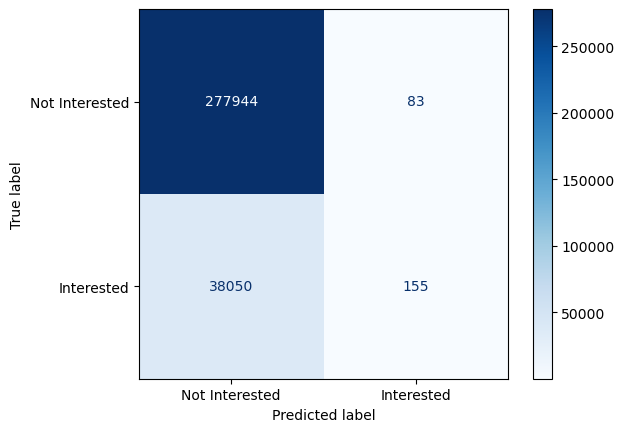

Score: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94    278027
           1       0.65      0.00      0.01     38205

    accuracy                           0.88    316232
   macro avg       0.77      0.50      0.47    316232
weighted avg       0.85      0.88      0.82    316232



NameError: name 'key' is not defined

In [464]:
y_prob, y_pred, scores  = CVS(lgbm,X,y,'lgbm')   

In [ ]:
scores

In [379]:
#y_pred , scores  = CVS(rf,X,y,'Random Forest')

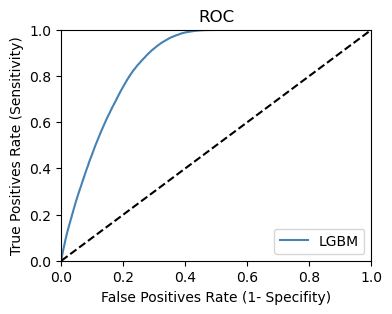

In [380]:
y_prob , auc  = ROC(lgbm,X,y,'LGBM')

In [381]:
y_prob

array([0.44217173, 0.01886349, 0.4411156 , ..., 0.0011507 , 0.1653361 ,
       0.04124881])

In [382]:
# import scikitplot as skplt
# import kds
# kds.metrics.plot_cumulative_gain(y, y_prob)

In [383]:
#pip install kds

In [384]:
fpr = {}
tpr = {}
roc_auc = {}
thresh = {}

model=[lgbm,xgb]
models_dict = {0:'LGBM'}

#for i,model in enumerate(models): 
for i in range(len(model)):
    model[i].fit(X_val,y_val)
    #y_prob = model.predict_proba(X)
    #y_prob = y_prob[:,1]
    y_probs=model[i].predict_proba(X_val)
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, y_probs[:,1], pos_label=1)
    roc_auc[i] = cross_val_score(model[i], X_val, y_val, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    
    
    fpr,tpr, threshold = roc_curve(y,y_prob)
    auc = roc_auc_score(y,y_prob)
    
plt.figure(figsize=(4, 3))
plt.plot(fpr[0],tpr[0], color='red')
plt.plot(fpr[1],tpr[1], color='red')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.xlabel("False Positives Rate (1- Specifity)")
plt.ylabel("True Positives Rate (Sensitivity)")
#plt.legend(loc = 'lower right') 
plt.show()    

ValueError: setting an array element with a sequence.

In [385]:
roc_auc

{0: 0.8607834667424655}

In [33]:
# kds.metrics.plot_cumulative_gain(y, y_prob)
# kds.metrics.plot_ks_statistic(y, y_prob)
# kds.metrics.plot_lift(y, y_prob)

In [386]:
results = data_prep2.copy()

In [387]:
results

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,1,Male,44,28.0,26.0,1,> 2 Years,Yes,0,40454.0,217,1
1,2,Male,76,3.0,26.0,1,1-2 Year,No,0,33536.0,183,0
2,3,Male,47,28.0,26.0,1,> 2 Years,Yes,0,38294.0,27,1
3,4,Male,21,11.0,152.0,1,< 1 Year,No,1,28619.0,203,0
4,5,Female,29,41.0,152.0,1,< 1 Year,No,1,27496.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,26.0,26.0,1,1-2 Year,No,1,30170.0,88,0
381105,381106,Male,30,37.0,152.0,1,< 1 Year,No,1,40016.0,131,0
381106,381107,Male,21,30.0,160.0,1,< 1 Year,No,1,35118.0,161,0
381107,381108,Female,68,14.0,124.0,1,> 2 Years,Yes,0,44617.0,74,0


In [151]:
results['predciton'] = y_pred
results['predciton_proba'] = y_prob

In [247]:
results.sort_values(by="predciton_proba", ascending=False).head(40)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response,predciton,predciton_proba
260265,260266,Male,52,28.0,26.0,1,< 1 Year,Yes,0,82414.0,92,1,1,0.768438
20005,20006,Male,52,28.0,26.0,1,< 1 Year,Yes,0,61913.0,220,1,1,0.767902
254355,254356,Male,53,28.0,26.0,1,< 1 Year,Yes,0,40470.0,221,1,1,0.764145
76695,76696,Male,53,30.0,26.0,1,< 1 Year,Yes,0,36905.0,279,0,1,0.758438
292587,292588,Female,53,28.0,26.0,1,< 1 Year,Yes,0,37728.0,218,1,1,0.755922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130329,130330,Female,48,28.0,26.0,1,< 1 Year,Yes,0,32474.0,108,1,1,0.628247
238605,238606,Male,56,8.0,124.0,1,< 1 Year,Yes,0,46298.0,43,1,1,0.626870
126937,126938,Female,42,28.0,26.0,1,< 1 Year,Yes,0,42072.0,286,0,1,0.626829
314762,314763,Male,46,28.0,26.0,1,< 1 Year,Yes,0,50800.0,18,1,1,0.626817


# Save Models

In [388]:
pickle.dump( xgb, open( 'C:\\Users\\Alysson\\Documents\\Projects\\Heal-Insurance-Classification\\models\\model_xgb_tunned.pkl', 'wb' ))
pickle.dump( lgbm, open( 'C:\\Users\\Alysson\\Documents\\Projects\\Heal-Insurance-Classification\\models\\model_lgbm_tunned.pkl', 'wb' ))

In [465]:
test_raw = pd.read_csv( '../data/test_raw.csv', index_col=0 )

In [466]:
test = test_raw.copy()

# API

In [467]:
import json
import requests
import sys

In [468]:
#sys.path.append('../..')

## Teste

In [469]:
example=test.sample(5)

In [470]:
example

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage
110614,491724,Female,36,1,29.0,0,1-2 Year,Yes,2630.0,156.0,56
87053,468163,Female,43,1,21.0,0,1-2 Year,Yes,32003.0,124.0,162
38340,419450,Male,22,1,28.0,1,< 1 Year,No,31631.0,160.0,128
3200,384310,Male,25,1,50.0,1,< 1 Year,No,31831.0,152.0,262
3896,385006,Male,33,1,41.0,1,< 1 Year,No,38284.0,152.0,256


In [433]:
df_json = json.dumps( example.to_dict( orient='records' ) )

In [434]:
df_json

'[{"id": 505085, "gender": 0, "age": 27, "driving_license": 1, "region_code": 21.0, "previously_insured": 1, "vehicle_age": 0, "vehicle_damage": 0, "annual_premium": 38336.0, "policy_sales_channel": 152.0, "vintage": 87}, {"id": 461489, "gender": 1, "age": 20, "driving_license": 1, "region_code": 3.0, "previously_insured": 0, "vehicle_age": 1, "vehicle_damage": 1, "annual_premium": 2630.0, "policy_sales_channel": 156.0, "vintage": 16}, {"id": 449012, "gender": 1, "age": 45, "driving_license": 1, "region_code": 28.0, "previously_insured": 0, "vehicle_age": 1, "vehicle_damage": 1, "annual_premium": 41246.0, "policy_sales_channel": 26.0, "vintage": 170}, {"id": 453692, "gender": 0, "age": 63, "driving_license": 1, "region_code": 28.0, "previously_insured": 0, "vehicle_age": 1, "vehicle_damage": 1, "annual_premium": 38743.0, "policy_sales_channel": 122.0, "vintage": 197}, {"id": 412190, "gender": 1, "age": 67, "driving_license": 1, "region_code": 18.0, "previously_insured": 1, "vehicle_age

In [471]:
url='http://127.0.0.1:5000/predict'
#url = 'https://rossmann-forecast-01.herokuapp.com/rossmann/predict'

header = {'Content-type': 'application/json'}
r = requests.post(url=url, data=df_json, headers=header)
print( 'Status Code {}'.format( r.status_code ) )

Status Code 200


In [472]:
r.json()

[{'id': 505085,
  'gender': 0.0,
  'age': 0.1489361702,
  'driving_license': 0.0,
  'region_code': 0.72,
  'previously_insured': 1.0,
  'vehicle_age': 0.0,
  'vehicle_damage': 0.0,
  'annual_premium': 0.9246426352,
  'policy_sales_channel': 0.9692307692,
  'vintage': 87,
  'prediction': 0.0018972169},
 {'id': 461489,
  'gender': 0.0,
  'age': 0.0,
  'driving_license': 0.0,
  'region_code': 0.0,
  'previously_insured': 0.0,
  'vehicle_age': 0.0,
  'vehicle_damage': 0.0,
  'annual_premium': 0.0,
  'policy_sales_channel': 1.0,
  'vintage': 16,
  'prediction': 0.0251507609},
 {'id': 449012,
  'gender': 0.0,
  'age': 0.5319148936,
  'driving_license': 0.0,
  'region_code': 1.0,
  'previously_insured': 0.0,
  'vehicle_age': 0.0,
  'vehicle_damage': 0.0,
  'annual_premium': 1.0,
  'policy_sales_channel': 0.0,
  'vintage': 170,
  'prediction': 0.0424270018},
 {'id': 453692,
  'gender': 0.0,
  'age': 0.914893617,
  'driving_license': 0.0,
  'region_code': 1.0,
  'previously_insured': 0.0,
  've

In [473]:
example_prediction = pd.DataFrame( r.json(), columns = r.json()[0].keys() )
example_prediction

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,prediction
0,505085,0.0,0.148936,0.0,0.72,1.0,0.0,0.0,0.924643,0.969231,87,0.001897
1,461489,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,1.000000,16,0.025151
2,449012,0.0,0.531915,0.0,1.00,0.0,0.0,0.0,1.000000,0.000000,170,0.042427
3,453692,0.0,0.914894,0.0,1.00,0.0,0.0,0.0,0.935182,0.738462,197,0.024245
4,412190,0.0,1.000000,0.0,0.60,1.0,0.0,0.0,0.765797,0.984615,220,0.001895


In [474]:
print('Number of Clients on Test: ', len(example_prediction))
print('Number of Interested Clients Predicted: ',example_prediction.prediction.sum())
print('Ratio of Interested Clients Predicted: ',(example_prediction.prediction.sum()/len(example_prediction)))

Number of Clients on Test:  5
Number of Interested Clients Predicted:  0.09561532360000001
Ratio of Interested Clients Predicted:  0.019123064720000003


## Test

In [51]:
Enconding(test)

In [217]:
Normalization(test)

vehicle_age       1.347440
annual_premium    1.077867
dtype: float64


In [218]:
test.sample(5)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage
77644,458754,0.0,0.107692,1.0,0.865385,1.0,0.0,0.0,0.456448,0.759259,64
106941,488051,1.0,0.307692,1.0,0.788462,1.0,0.5,0.0,0.000000,0.759259,129
39242,420352,1.0,0.784615,1.0,0.538462,0.0,0.5,1.0,0.440008,0.154321,226
32578,413688,0.0,0.061538,1.0,0.711538,0.0,0.0,1.0,0.476444,0.154321,287
49478,430588,1.0,0.076923,1.0,0.865385,1.0,0.0,0.0,0.438126,0.932099,289


In [219]:
X_test = test[selected_features]
X_test.shape, X.shape

((127037, 9), (316232, 9))

In [86]:
lgbm.fit(X, y)
ypred_xgb_tuned=lgbm.predict_proba(X_test)
ypred_xgb_tuned

NameError: name 'X_test' is not defined

In [236]:
test_raw['response'] = ypred_xgb_tuned

In [240]:
aux = test_raw.loc[test_raw.response ==1]

In [245]:
aux.head(25)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
1428,382538,Female,54,1,46.0,0,< 1 Year,Yes,40482.0,11.0,216,1
1485,382595,Male,54,1,46.0,0,< 1 Year,Yes,29342.0,124.0,163,1
1526,382636,Male,57,1,8.0,0,< 1 Year,Yes,29877.0,26.0,108,1
3358,384468,Male,29,1,3.0,0,< 1 Year,Yes,2630.0,124.0,19,1
3761,384871,Male,34,1,11.0,0,1-2 Year,Yes,2630.0,163.0,225,1
4187,385297,Female,50,1,28.0,0,< 1 Year,Yes,40943.0,124.0,53,1
5403,386513,Male,33,1,6.0,0,< 1 Year,Yes,2630.0,124.0,236,1
8949,390059,Female,44,1,8.0,0,< 1 Year,Yes,45584.0,26.0,39,1
12108,393218,Female,31,1,3.0,0,< 1 Year,Yes,2630.0,124.0,171,1
14362,395472,Female,50,1,8.0,0,< 1 Year,Yes,75601.0,25.0,146,1


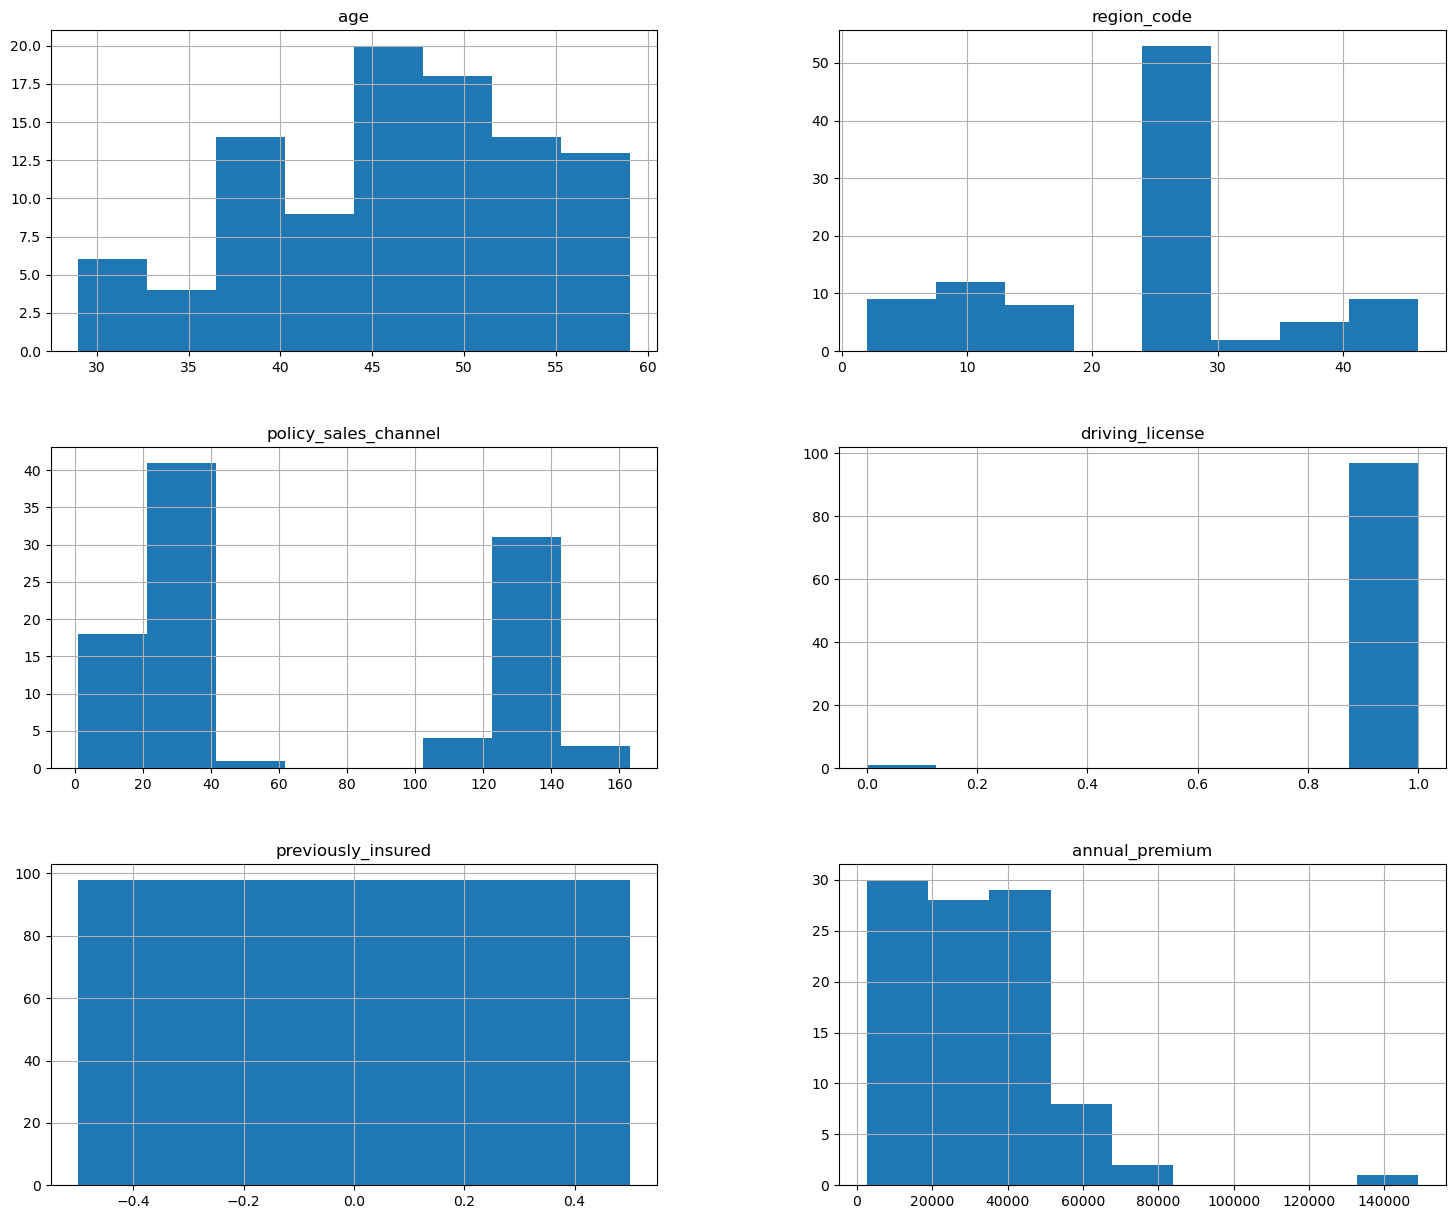

In [241]:
aux[numerical_features].hist(figsize=(18,15), bins='auto');

In [233]:
print('Number of Clients on Test: ', len(ypred_xgb_tuned))
print('Number of Interested Clients Predicted: ',ypred_xgb_tuned.sum())

print('Ratio of Interested Clients Predicted: ',(ypred_xgb_tuned.sum()/len(ypred_xgb_tuned)))

Number of Clients on Test:  127037
Number of Interested Clients Predicted:  98
Ratio of Interested Clients Predicted:  0.0007714287963349261


## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Feature Importance</p></div>

In [444]:
lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=100, eval_metric=['binary_logloss','auc'])

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's binary_logloss: 0.28443	training's auc: 0.86365	valid_1's binary_logloss: 0.287087	valid_1's auc: 0.860618
[200]	training's binary_logloss: 0.265071	training's auc: 0.865744	valid_1's binary_logloss: 0.26803	valid_1's auc: 0.862263
[300]	training's binary_logloss: 0.258675	training's auc: 0.867105	valid_1's binary_logloss: 0.261967	valid_1's auc: 0.863146
[400]	training's binary_logloss: 0.256131	training's auc: 0.868119	valid_1's binary_logloss: 0.259857	valid_1's auc: 0.863651
[500]	training's binary_logloss: 0.254912	training's auc: 0.86902	valid_1's binary_logloss: 0.25916	valid_1's auc: 0.864026


LGBMClassifier(learning_rate=0.01, n_estimators=500, random_state=42)

100%|===================| 252882/252985 [40:35<00:00]        

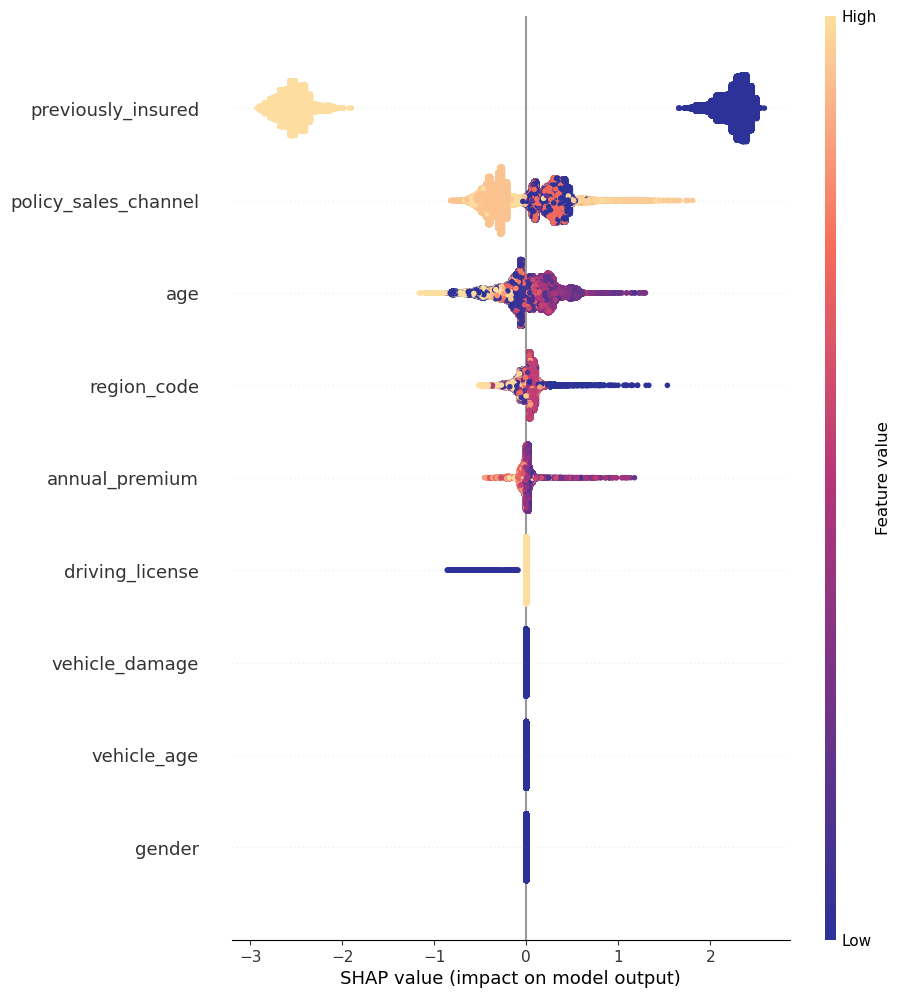

In [658]:
# sunset=LinearSegmentedColormap.from_list('sunset', [(0, '#2C3298'), (0.5, '#B53679'),
#                                                     (.75, '#F56C5B'), (1, '#FDDEA0')], N=256)
explainer = shap.Explainer(lgbm, X_train)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values, order=shap_values.abs.mean(0), max_display=20, 
                    color=sunset, plot_size=[9,12]) 

In [ ]:
ft_importance = pd.DataFrame({"Feature Importance":np.abs(shap_values.values).mean(0)}, index=X_train.columns)
X_cols=ft_importance.query('`Feature Importance` > 0.1').sort_values(by="Feature Importance", ascending=False)
X_cols.style.background_gradient(cmap=sunset, vmin=.001, vmax=.6).format({"Feature Importance": "{:.3f}"})

In [1]:
import pickle
import os
import pandas as pd
from flask import Flask, request, Response
from healthinsurance.HealthInsurance import HealthInsurance

# load model in memory
model = pickle.load(open('models/xgbclassifier_model.pkl', 'rb'))

# initialize API
app = Flask(__name__)

# create endpoint
@app.route('/predict', methods=['POST'])
def health_insurance_predict():
    test_json = request.get_json()

    if test_json: #there is data
        if isinstance(test_json, dict): #unique row
            test_raw = pd.DataFrame(test_json, index = [0])
        else: # multiple rows
            test_raw = pd.DataFrame(test_json, columns = test_json[0].keys())

        #needed cause test_raw will be overwritten on pipeline
        test_raw_original = test_raw.copy()

        # instantiate HealthInsurance class
        pipeline = HealthInsurance()

        # data cleaning
        df1 = pipeline.data_cleaning(test_raw)

        # feature engineering
        df2 = pipeline.feature_engineering(df1)

        # data preparation
        df3 = pipeline.data_preparation(df2)

        # prediction
        df_response = pipeline.get_prediction(model, test_raw_original, df3)

        #returns a json
        return df_response

    else: #if empty:
        return Response('{}', status = 200, mimetype = 'application/json')

if __name__ == '__main__':
    port = os.environ.get( 'PORT', 5000 )
    app.run( host='0.0.0.0', port=port )

ModuleNotFoundError: No module named 'healthinsurance'